<h1 style="text-align:center;font-size:30px;"> Amazon Fashion Recommendation Engine </h1>

# Table of Contents

#### [1]  Business Problem
#### [2]  Machine Learning Probelm
#### [3]  Data Understanding
#### [4]  Data Preprocessing
#### [5]  ML Modelling
#### [6]  Conclusion

# 1. Business Problem

## 1.1 Description

<p>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Amazon Inc., doing business as Amazon, is an electronic commerce and cloud computing company based in Seattle, Washington, that was founded by Jeff Bezos on July 5, 1994. The tech giant is the largest Internet retailer in the world as measured by revenue and market capitalization, and second largest after Alibaba Group in terms of total sales. The Amazondot website started as an online bookstore and later diversified to sell video downloads/streaming, MP3 downloads/streaming, audiobook downloads/streaming, software, video games, electronics, apparel, furniture, food, toys, and jewelry. The company also owns a publishing arm, Amazon Publishing, a film and television studio, Amazon Studios, produces consumer electronics lines including Kindle e-readers, Fire tablets, Fire TV, and Echo devices, and is the world's largest provider of cloud infrastructure services (IaaS and PaaS) through its AWS subsidiary. Amazon also sells certain low-end products under its in-house brand AmazonBasics.
    </p>
    
<p> It is estimated that 35% of Amazon's revenue is generated by Product Recommendations.</p>
        

<blockquote><p>Credits: Wikipedia</p>
</blockquote>

## 1.2 Problem Statement

* __Given an Apparel, Generate a Set of Recommendations Relevent to that Apparel.__


<img src="https://i.imgur.com/fg14zv7.png" alt="Flowers in Chania">

<blockquote><p>Credits: Amazon.in</p>
</blockquote>

## 1.3 Sources/Useful Links

* Source of Data : https://drive.google.com/open?id=0BwNkduBnePt2VWhCYXhMV3p4dTg

## 1.4 Real world/Business Objectives and Constraints

* There are no stricts latency constraints.
* Recommendations that are variations(size) of the same apparel are not preferred.
* Interpretability in understanding the recommendations of an apparel.

# 2. Machine Learning Problem

## 2.1 Data Overview
- Data will be in a file : tops_fashion.json 
- It contains 19 columns. 
- Size of Train.csv - 250MB 
- Number of apparels in the data = 183, 138

## 2.2 Mapping the real world problem to an ML problem
### 2.2.1 Type of Machine Leaning Problem

* This is a similarity based problem. Compute the similarity between two apparels.
* This can be solved using Nearest Neighbors.

### 2.2.2 Similarity Metrics

* Cosine Distance
* Euclidean Distance


# 3.  Data Understanding

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, OrderedDict
from tqdm import tqdm_notebook, tqdm
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string


sns.set_palette('husl')

%matplotlib inline

In [2]:
data = pd.read_json('data/tops_fashion.json')
print(f"Number of apparels : {data.shape[0]}")
print(f"Number of features : {data.shape[1]}")

Number of apparels : 183138
Number of features : 19


In [3]:
data.columns

Index(['asin', 'author', 'availability', 'availability_type', 'brand', 'color',
       'editorial_reivew', 'editorial_review', 'formatted_price',
       'large_image_url', 'manufacturer', 'medium_image_url', 'model',
       'product_type_name', 'publisher', 'reviews', 'sku', 'small_image_url',
       'title'],
      dtype='object')

In [4]:
data.head(2)

,asin,author,availability,availability_type,brand,color,editorial_reivew,editorial_review,formatted_price,large_image_url,manufacturer,medium_image_url,model,product_type_name,publisher,reviews,sku,small_image_url,title
0,B016I2TS4W,None,None,None,FNC7C,None,NaN,Minions Como Superheroes Ironman Women's O Nec...,None,https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,None,SHIRT,None,"[False, https://www.amazon.com/reviews/iframe?...",None,https://images-na.ssl-images-amazon.com/images...,Minions Como Superheroes Ironman Long Sleeve R...
1,B01N49AI08,None,None,None,FIG Clothing,None,NaN,Sizing runs on the small side. FIG® recommends...,None,https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,None,SHIRT,None,"[False, https://www.amazon.com/reviews/iframe?...",None,https://images-na.ssl-images-amazon.com/images...,FIG Clothing Womens Izo Tunic


__Of these 19 features, we will be using only 6 features.__

1. __asin               :__  Amazon standard identification number
2. __brand              :__ brand to which the apparel belongs to
3. __color              :__ Color information of apparel, it can contain many colors as   a value eg: red and black stripes
4. __product_type_name  :__ type of the apparel, ex: SHIRT/TSHIRT
5. __medium_image_url   :__  url of the apparel's image
6. __title              :__  title of the apparel

In [5]:
# Selecting only 7 features due to configuration limitations
data = data[['asin', 'brand', 'color', 'product_type_name', 'medium_image_url', 'title']]
data.head(5)

,asin,brand,color,product_type_name,medium_image_url,title
0,B016I2TS4W,FNC7C,None,SHIRT,https://images-na.ssl-images-amazon.com/images...,Minions Como Superheroes Ironman Long Sleeve R...
1,B01N49AI08,FIG Clothing,None,SHIRT,https://images-na.ssl-images-amazon.com/images...,FIG Clothing Womens Izo Tunic
2,B01JDPCOHO,FIG Clothing,None,SHIRT,https://images-na.ssl-images-amazon.com/images...,FIG Clothing Womens Won Top
3,B01N19U5H5,Focal18,None,SHIRT,https://images-na.ssl-images-amazon.com/images...,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,SHIRT,https://images-na.ssl-images-amazon.com/images...,Featherlite Ladies' Long Sleeve Stain Resistan...


##  Basic Stats for Various Features

## 3.1. product_type_name

In [6]:
data.product_type_name.describe()

count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object

Text(0.5, 1.0, 'Distribution of top 20 PRODUCTS')

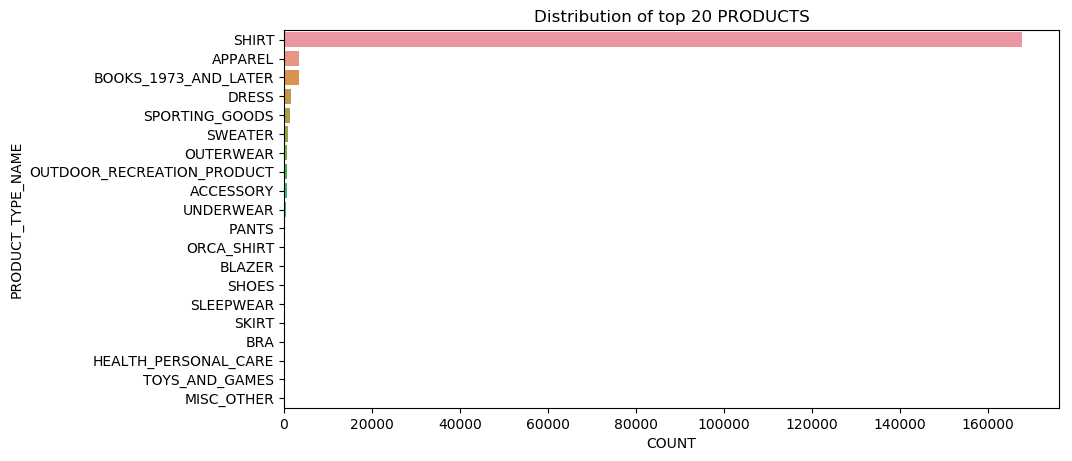

In [7]:
product_data = OrderedDict(Counter(data.product_type_name).most_common(20))

plt.figure(figsize=(10, 5), dpi=100)
sns.barplot(list(product_data.values()), list(product_data.keys()))
plt.xlabel('COUNT')
plt.ylabel('PRODUCT_TYPE_NAME')
plt.title('Distribution of top 20 PRODUCTS')

__Observations__
* All the apparels have the product info.
* There are 72 Unique products, of which 'SHIRT' is the most frequent product one(92%).
* We've very few apparels of other product types.

## 3.2 brand

In [8]:
data.brand.describe()

count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object

Text(0.5, 1.0, 'Distribution of top 20 BRANDS')

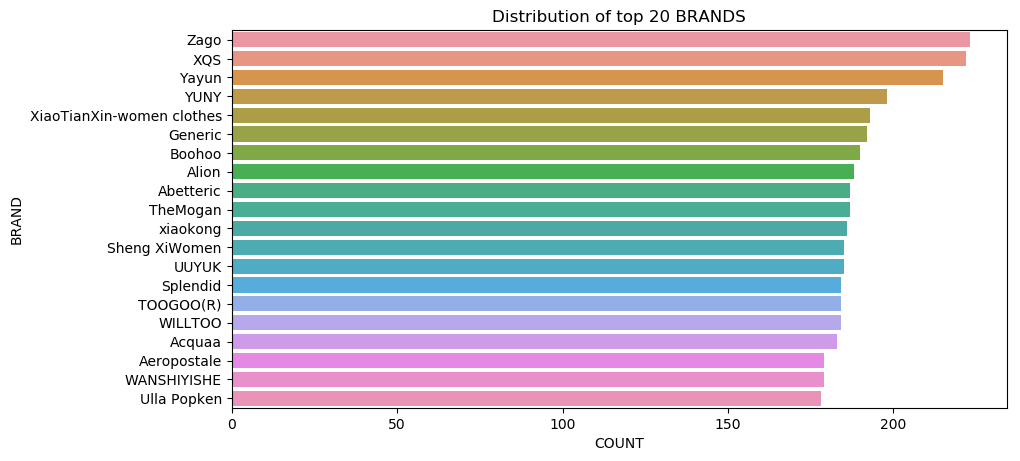

In [9]:
brand_data = OrderedDict(Counter(data.brand).most_common(20))

plt.figure(figsize=(10, 5), dpi=100)
sns.barplot(list(brand_data.values()), list(brand_data.keys()))
plt.xlabel('COUNT')
plt.ylabel('BRAND')
plt.title('Distribution of top 20 BRANDS')

__Observations__
* All most all the products have the brand info.
* There are 10577 Unique brands, in which 'Zago' appears frequently.

## 3.3 color

In [10]:
data.color.describe()

count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object

In [11]:
print(f"percentage of apparels with color data : {100* (1 - data.color.isnull().sum()/data.shape[0]) : .2f}%")

percentage of apparels with color data :  35.47%


Text(0.5, 1.0, 'Distribution of top 20 COLORS')

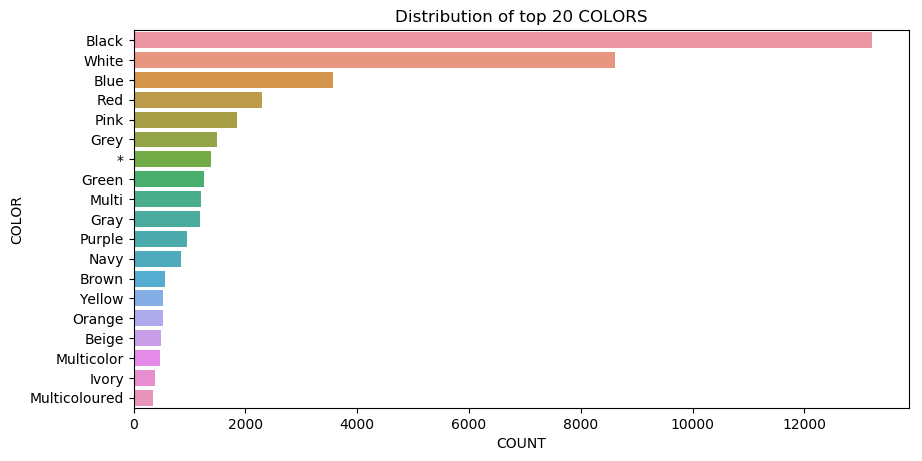

In [12]:
color_data = OrderedDict(Counter(data.color).most_common(20))

plt.figure(figsize=(10, 5), dpi=100)
sns.barplot(list(color_data.values()), list(color_data.keys()))
plt.xlabel('COUNT')
plt.ylabel('COLOR')
plt.title('Distribution of top 20 COLORS')

__Observations__ 
* Only 35.5% of the apparels have the color info. We've to remove the apparels from the data with no colr.
* 20% of the apparels having color are 'black' colored.
* The character (`*`) exists in the color info, we might have to remove those apparels with '*' color as well.

## 3.4 title

In [13]:
data.title.describe()

count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object

In [14]:
title_len_data = data.title.apply(lambda x : len(x.split()) if x is not None else 0).values

Text(0.5, 1.0, 'Distribution of TITLE lengths')

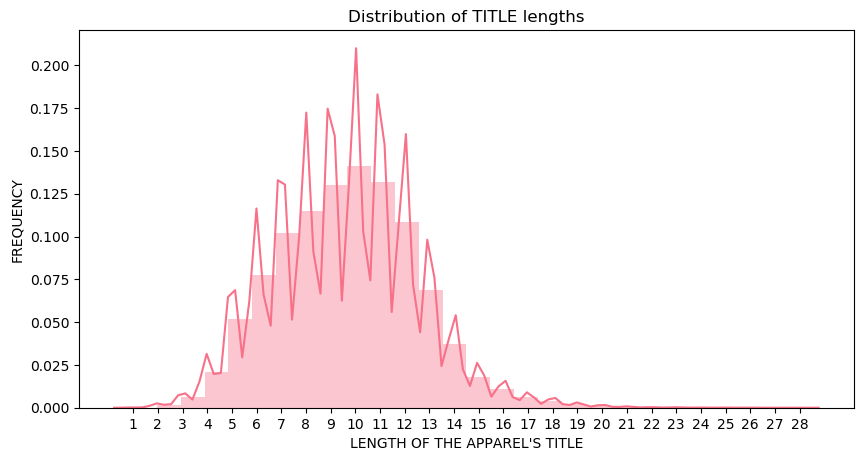

In [15]:
plt.figure(figsize=(10, 5), dpi=100)
sns.distplot(title_len_data, bins=title_len_data.max())
plt.xlabel("LENGTH OF THE APPAREL'S TITLE")
plt.ylabel('FREQUENCY')
plt.xticks(np.unique(title_len_data))
plt.title('Distribution of TITLE lengths')

__Observations__ 
* All the apparels have the title.
* The average length of a title is 11.
* There are very few apparels with title length <= 3.

# 4. Text Preprocessing / Data Cleaning

## 4.1 Removing apparels with null valued features

* We'll remove the apparels with have no info in any of the six features.
* We'll only consider the apparels with all features present.
* We'll also remove apparels with title length less than 4 as the short description of the title gives much less info.

In [16]:
#remove the apparels with null values
data.dropna(axis='index', inplace=True)

In [17]:
#remove the apparels with very few words in title
data = data[data.title.apply(lambda title : len(title.split()) > 3)]

In [18]:
print(f"Number of apparels remaining after removing the null values and less worded titles : {data.shape[0]}")

Number of apparels remaining after removing the null values and less worded titles : 64312


__The number of apparels has remained drastically from 183K to 64K.__

## 4.2 Removing duplicates

In [19]:
data.sort_values('title', inplace=True)
print(f"Number of apparels with same title  and same color : {data.duplicated(['title', 'color']).sum()}")

Number of apparels with same title  and same color : 2041


In [20]:
data[data.duplicated(['title', 'color'])].head(6)

,asin,brand,color,product_type_name,medium_image_url,title
105741,B00UUEQC6M,GLJ TRADING,B318 SD_BLACK,SHIRT,https://images-na.ssl-images-amazon.com/images...,(Plus Size) Cutout Crochet Lined Tunic with Ch...
135593,B013PQVV7G,GLJ TRADING,Black,SHIRT,https://images-na.ssl-images-amazon.com/images...,(Plus Size) Solid Color Long Sleeve Asymmetric...
106504,B013PQW6CK,GLJ TRADING,Mocha,SHIRT,https://images-na.ssl-images-amazon.com/images...,(Plus Size) Solid Color Long Sleeve Asymmetric...
127007,B013PQW50S,GLJ TRADING,Mocha,SHIRT,https://images-na.ssl-images-amazon.com/images...,(Plus Size) Solid Color Long Sleeve Asymmetric...
107950,B074SYFP2W,PBJS DESIGNS,Dark Heather,SHIRT,https://images-na.ssl-images-amazon.com/images...,1 Philippians 4:13 I Can Do All Things.. Women...
161139,B074SRT6LV,PBJS DESIGNS,Dark Heather,SHIRT,https://images-na.ssl-images-amazon.com/images...,1 Philippians 4:13 I Can Do All Things.. Women...


In [21]:
## dropping the duplicates with same title and color
data.drop_duplicates(['title', 'color'], inplace=True)

In [22]:
print(f"Number of apparels with same title : {data.duplicated('title').sum()}")

Number of apparels with same title : 1089


In [23]:
data[data.duplicated('title')].head(7)

,asin,brand,color,product_type_name,medium_image_url,title
114281,B01LWSP7G2,Faithful Findings,Gray,SHIRT,https://images-na.ssl-images-amazon.com/images...,"#Hope, Women's Jr Size Tee, Religious, Faith-I..."
128781,B01M01WPN4,Faithful Findings,Green,SHIRT,https://images-na.ssl-images-amazon.com/images...,"#Love, Women's Jr Size Tee, Religious, Faith-I..."
163728,B013PQVXN8,GLJ TRADING,Black,SHIRT,https://images-na.ssl-images-amazon.com/images...,(Plus Size) Solid Color Long Sleeve Asymmetric...
5057,B01HOV0CVY,100 % LIN,Blue,SHIRT,https://images-na.ssl-images-amazon.com/images...,100 % LIN Women's Tunic HELENE
48510,B01MCV4T1Q,ZIYUO,Army Green,SHIRT,https://images-na.ssl-images-amazon.com/images...,"2016 Long Sleeve Hoodie,ZIYUO(TM) Womens Loose..."
10265,B01CE4GISM,ACEVOG,Black,SHIRT,https://images-na.ssl-images-amazon.com/images...,ACEVOG Womens Backless Cross Straps Loose Off ...
9061,B07568C8GD,ALC Creation,White,SHIRT,https://images-na.ssl-images-amazon.com/images...,ALC Creations Women's Cotton Tshirt




- dup1 : #Hope, Women's Jr Size Tee, Religious, Faith-Inspired, Christian Apparel
- dup2 : #Love, Women's Jr Size Tee, Religious, Faith-Inspired, Christian Apparel


- dup1 : (Plus Size) Cutout Crochet Lined Tunic with Chain Necklace Blouse (MADE IN U.S.A)
- dup2 : (Plus Size) Solid Color Long Sleeve Asymmetric Hem Cardigan (MADE IN U.S.A)
- dup3 : (Plus Size) Solid Color Long Sleeve Asymmetric Hem Cardigan (MADE IN U.S.A)
- dup4 : (Plus Size) Solid Color Long Sleeve Asymmetric Hem Cardigan (MADE IN U.S.A)

__1. From the above tables, we can observe that the multiple apparels have the same title.__<br>
__2. This is because there are similar apparels in various colors and various sizes.__<br>
__3. Amazon maintains a unique asin to each product So they ended up in our data.__<br>
__4. Amazon has mutliple size/color apparels with same design on the apparel page itself.__<br>
__4. Recommending the same apparel with different color or different size might not be appropriate for the customer.__

In [24]:
## dropping the duplicates
data.drop_duplicates('title', inplace=True)
print(f"Number of apparels remaining after removing duplicates : {data.shape[0]}")

Number of apparels remaining after removing duplicates : 61182


## 4.3 Removing Special Characters

* We'll remove any other character in the string other than alphabets(a-z).

In [26]:
before_text = data.title.iloc[999]

data.title = data.title.apply(lambda title : title.lower())
data.title = data.title.apply(lambda title : title.replace('t-shirt', 'tshirt'))
data.title = data.title.apply(lambda title : title.replace('t shirt', 'tshirt'))
#remove special characters
data.title = data.title.apply(lambda title : re.sub(r"""[-,@_!#$%^&*()<.>?/\|}{~:"']""", r"", title).strip())
#remove numerical characters
data.title = data.title.apply(lambda title : re.sub(r'\d+', r"", title).strip())
#remove anything other than alphabets
data.title = data.title.apply(lambda title : re.sub(r'[^a-zA-Z]', r" ", title).strip())
#make the color column lowercase
data.color = data.color.apply(lambda color : color.lower())

In [27]:
print(f"Before removing unwanted chars : {before_text}")
print(f"After removing unwanted chars  : {data.title.iloc[999]}")

Before removing unwanted chars : AMA(TM) Women Sexy Vest Sleeveless Tops Crop Tank Tops Blouse T-Shirt
After removing unwanted chars  : amatm women sexy vest sleeveless tops crop tank tops blouse tshirt


## 4.4 Removing Near Duplicates

<pre>
Title 1:
16. woman's place is in the house and the senate shirts for Womens XXL White
17. woman's place is in the house and the senate shirts for Womens M Grey

Title 2:
25. tokidoki The Queen of Diamonds Women's Shirt X-Large
26. tokidoki The Queen of Diamonds Women's Shirt Small
27. tokidoki The Queen of Diamonds Women's Shirt Large

Title 3:
61. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
62. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
63. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
64. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
</pre>

 __Some of the apparels have duplicate titles that differ only in few words.__<br>
 __This poses the same problem as duplictes. So we'll remove these near duplictes too.__<br>
 __These are the same apparels listed on Amazon with different titles and sizes.__<br>

In [28]:
data.head()

,asin,brand,color,product_type_name,medium_image_url,title
118987,B008D30AGK,Out+of+Print+Clothing,multicolored,SHIRT,https://images-na.ssl-images-amazon.com/images...,retro book cover womens slim fit tshirt by out...
149224,B01E0XLYHA,GreaterGood,blue,SHIRT,https://images-na.ssl-images-amazon.com/images...,ask me about my granddog tshirt
78827,B003IDE8XQ,Maggie's Organics,grey,HOME,https://images-na.ssl-images-amazon.com/images...,camisoles grey medium fair labor pc
50056,B00CQ83SDA,Organically Grown,slate blue,SHIRT,https://images-na.ssl-images-amazon.com/images...,dandelion virtue womens organic dolman top by ...
36310,B00CQ8RL10,Organically Grown,turquoise,SHIRT,https://images-na.ssl-images-amazon.com/images...,dandelion virtue womens organic fashion top in...


In [76]:
def is_near_duplicate(s1, s2):
    
    """
    Compute the words shared ratio between s1 and s2
    \n
    word_shared_ratio = len(set(s1_words).intersection(set(s2_words))) / max(len(set(s1_words)), len(set(s2_words)))
    \n 
    if word_shared_ratio > threshold, then we'll keep s1 and declare s2 as duplicate. 
    \n
    the value of threshold is chosen by the number of words differ, here #word_differ = half, hence 0.5
    """
    
    s1_w = s1.strip().split()
    s2_w = s2.strip().split()
    
    return (len(set(s1_w) & set(s2_w)) / max(len(s1_w), len(s2_w))) >= 0.5

__Testing the is_near_duplicate() function.__

In [70]:
def test_is_near_duplicate(idx=None):
    
    idx = np.random.randint(0, data.shape[0], 1)[0] if idx is None else idx
    s1 = data.title.loc[data.index[idx]]
    s2 = data.title.loc[data.index[idx+1]]

    
    print(f"s1 : {s1}")
    print(f"s2 : {s2}")
    print()
    print(f"is near duplicate : ({is_near_duplicate(s1, s2) >= 0.50}) {is_near_duplicate(s1, s2) : .2f}")
    

In [71]:
test_is_near_duplicate() 

s1 : bimbo dsgns women s casual crew neck  sleeves black  white tshirt
s2 : bimbo dsgns women s casual round neck short sleeves white cotton tshirt

is near duplicate : (True)  0.75


In [72]:
test_is_near_duplicate() 

s1 : dh apple vintage print v neck raglan top plus size loose tshirts
s2 : dh apple womens letter print plus size loose casual summer tshirts top

is near duplicate : (True)  0.67


In [73]:
test_is_near_duplicate() #similar

s1 : floral impression long sleeve blouse tin haul collection
s2 : floral medallion orange multi color chiffon sleeveless top blouse

is near duplicate : (False)  0.22


In [74]:
test_is_near_duplicate() 

s1 : franklin and marshall womens logo vest top patriot
s2 : franterd women boho tank tops vestshirt blouse

is near duplicate : (False)  0.00


In [77]:
indices = list(data.index.values)
print(f"Number of apparels before removing near duplictes : {len(indices)}")

Number of apparels before removing near duplictes : 61182


__To find near duplicates, we've to compare each and every title in the list with other.__<br>
__This would consume large amount of time. The time complexity of this brute force algorithm is O(n*n).__<br>
__As we have large number of apparels to compare over, one hack we can perform to speed up the computation.__<br><br>
__1. Let us assume that maximum number of duplicates for a title are 20.__<br>
__2. Sort the data in alphabetical order.__<br>
__3. Compare each title with only 10 neighoring titles as the probability of finding the near duplicate will be high.__<br>
__4. The computation is much faster using this hack.__<br>
__5. Ofcourse, this hack will not remove duplicates completely, but provides an optimal solution.__

In [78]:
len_idxs = len(indices) - 1
window = 20

for i, idx in tqdm(enumerate(indices)):
    s1 = data.title.loc[idx]
    
    for jdx in indices[min(len_idxs, i+1): min(len_idxs, i+window)]:
        s2 = data.title.loc[jdx]
        if is_near_duplicate(s1, s2):
            indices.remove(jdx)
    #break

27918it [00:29, 956.65it/s]


In [79]:
print(f"Number of apparels before removing near duplictes : {len(indices)}")

Number of apparels before removing near duplictes : 27918


In [80]:
data = data.loc[indices]
data.head()

,asin,brand,color,product_type_name,medium_image_url,title
118987,B008D30AGK,Out+of+Print+Clothing,multicolored,SHIRT,https://images-na.ssl-images-amazon.com/images...,retro book cover womens slim fit tshirt by out...
149224,B01E0XLYHA,GreaterGood,blue,SHIRT,https://images-na.ssl-images-amazon.com/images...,ask me about my granddog tshirt
78827,B003IDE8XQ,Maggie's Organics,grey,HOME,https://images-na.ssl-images-amazon.com/images...,camisoles grey medium fair labor pc
50056,B00CQ83SDA,Organically Grown,slate blue,SHIRT,https://images-na.ssl-images-amazon.com/images...,dandelion virtue womens organic dolman top by ...
407,B016OZOHIK,Fluffy co.,putty,APPAREL,https://images-na.ssl-images-amazon.com/images...,desert flash crop top hip design made in the usa


## 4.5 Removing the stopwords

* Words such as {the, in, an, how, can,..} and single letter alphabets and less informative.
* These words do not contribute much to the semanticity of the title. So we'll remove them.

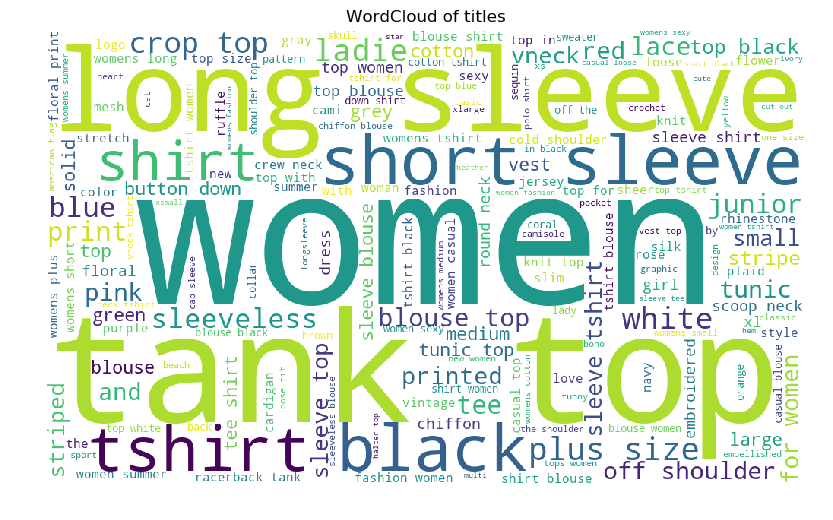

In [81]:
text_data = " ".join(data.title)

wordcloud = WordCloud(width = 1000, height = 600, 
                      background_color ='white',
                      stopwords = set(['no', 'stop words', 'here']),
                      min_font_size = 10).generate(text_data)


plt.figure(figsize=(10, 5), dpi=100)
plt.title('WordCloud of titles')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)

__Common words like {the, is, an,...} appear rarely in the title. Anyways we'll remove them.__<br>
__Here we'll compile a selected set of stopwords to be removed.__

In [82]:
STOPWORDS = set({'is', 'are', 'am', 'a', 'as', 'an', 'the', 'how', 'it', 'for', 'to', 'too',
                 'this', 'that', 'of', 'my', 'me', 'than', 'its', 'there', 'by', 'in', 'on'})
#list of single letter alphabets
STOPWORDS.update(list(string.ascii_lowercase))

In [83]:
before_text = data.title.iloc[66]
data.title = data.title.apply(lambda title : " ".join(filter(lambda word : word not in STOPWORDS,  title.split())))

In [84]:
print(f"title before stopword removal : {before_text}")
print(f"title after stopword removal  : {data.title.iloc[66]}")

title before stopword removal : cotton camisole pack assorted size extra large x
title after stopword removal  : cotton camisole pack assorted size extra large


In [85]:
#save to disk
data.to_pickle('28k_preprocessed_data')

* We've summarized some basic statistics of the features to make sense of the data.
* We've gone through multiple preprocessing steps.
* Next we'll start builing ML models.

__Please Open the Next Notebook__